<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/ex_sampling_generate_data_n100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm

from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://github.com/iam-fern/Research/raw/main/sampling_generate_data_n100.csv', index_col=['rep', 'index'])
df

Xt1       Xt2       Xt3  ...          Y     y_hat      e_hat
rep  index                                ...                                
1.0  0.0    0.906858 -0.153071  0.707619  ...   6.680007  6.485095   0.194912
     1.0   -2.222386  0.977867  0.210546  ...   6.106436  5.664955   0.441481
     2.0   -0.041485  0.009604  1.076785  ...   7.874238  7.810937   0.063300
     3.0    1.860132  1.070535 -0.415563  ...   6.601539  4.866792   1.734747
     4.0    0.466116 -0.673376  0.575422  ...   5.097845  4.941278   0.156567
...              ...       ...       ...  ...        ...       ...        ...
99.0 95.0   0.358068  0.163239  1.374794  ...   9.338253  9.296795   0.041458
     96.0   1.511250  0.745077 -0.976823  ...   1.523260  2.134821  -0.611561
     97.0  -0.107470  1.038227  0.481028  ...   7.715965  7.439354   0.276611
     98.0   0.662325  1.208179  0.290453  ...  10.099782  7.294448   2.805335
     99.0  -0.497046  2.565349 -0.720152  ...  20.508531  5.640307  14.868224

[9900 rows x 7 columns]

In [3]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

Xt1       Xt2       Xt3  ...          Y     y_hat      e_hat
rep  index                                ...                                
1.0  0.0    0.906858 -0.153071  0.707619  ...   6.680007  6.485095   0.194912
     1.0   -2.222386  0.977867  0.210546  ...   6.106436  5.664955   0.441481
     2.0   -0.041485  0.009604  1.076785  ...   7.874238  7.810937   0.063300
     3.0    1.860132  1.070535 -0.415563  ...   6.601539  4.866792   1.734747
     4.0    0.466116 -0.673376  0.575422  ...   5.097845  4.941278   0.156567
...              ...       ...       ...  ...        ...       ...        ...
99.0 95.0   0.358068  0.163239  1.374794  ...   9.338253  9.296795   0.041458
     96.0   1.511250  0.745077 -0.976823  ...   1.523260  2.134821  -0.611561
     97.0  -0.107470  1.038227  0.481028  ...   7.715965  7.439354   0.276611
     98.0   0.662325  1.208179  0.290453  ...  10.099782  7.294448   2.805335
     99.0  -0.497046  2.565349 -0.720152  ...  20.508531  5.640307  14.868224

[9900 rows x 7 columns]

In [4]:
table.reset_index(inplace=True)
table

,rep,index,Xt1,Xt2,Xt3,e,Y,y_hat,e_hat
0,1.0,0.0,0.906858,-0.153071,0.707619,-5.570084e-04,6.680007,6.485095,0.194912
1,1.0,1.0,-2.222386,0.977867,0.210546,7.706229e-01,6.106436,5.664955,0.441481
2,1.0,2.0,-0.041485,0.009604,1.076785,-1.202002e-08,7.874238,7.810937,0.063300
3,1.0,3.0,1.860132,1.070535,-0.415563,1.747711e+00,6.601539,4.866792,1.734747
4,1.0,4.0,0.466116,-0.673376,0.575422,-1.500559e-01,5.097845,4.941278,0.156567
...,...,...,...,...,...,...,...,...,...
9895,99.0,95.0,0.358068,0.163239,1.374794,9.084287e-04,9.338253,9.296795,0.041458
9896,99.0,96.0,1.511250,0.745077,-0.976823,-6.822947e-01,1.523260,2.134821,-0.611561
9897,99.0,97.0,-0.107470,1.038227,0.481028,4.699114e-01,7.715965,7.439354,0.276611
9898,99.0,98.0,0.662325,1.208179,0.290453,2.976953e+00,10.099782,7.294448,2.805335


In [5]:
table.set_index(['rep', 'index'], inplace=True)

In [6]:
table

Xt1       Xt2       Xt3  ...          Y     y_hat      e_hat
rep  index                                ...                                
1.0  0.0    0.906858 -0.153071  0.707619  ...   6.680007  6.485095   0.194912
     1.0   -2.222386  0.977867  0.210546  ...   6.106436  5.664955   0.441481
     2.0   -0.041485  0.009604  1.076785  ...   7.874238  7.810937   0.063300
     3.0    1.860132  1.070535 -0.415563  ...   6.601539  4.866792   1.734747
     4.0    0.466116 -0.673376  0.575422  ...   5.097845  4.941278   0.156567
...              ...       ...       ...  ...        ...       ...        ...
99.0 95.0   0.358068  0.163239  1.374794  ...   9.338253  9.296795   0.041458
     96.0   1.511250  0.745077 -0.976823  ...   1.523260  2.134821  -0.611561
     97.0  -0.107470  1.038227  0.481028  ...   7.715965  7.439354   0.276611
     98.0   0.662325  1.208179  0.290453  ...  10.099782  7.294448   2.805335
     99.0  -0.497046  2.565349 -0.720152  ...  20.508531  5.640307  14.868224

[9900 rows x 7 columns]

In [8]:
# แสดงค่าของ Replicate ที่ 1.0
new_table = table.loc[3]
new_table

,Xt1,Xt2,Xt3,e,Y,y_hat,e_hat
index,,,,,,,
0.0,-0.980798,-1.348806,1.346275,1.373408,7.804471,6.086702,1.717769
1.0,-0.180565,0.457295,0.021327,0.011764,4.702258,4.714421,-0.012163
2.0,0.567100,0.604550,-0.468676,0.029851,3.476282,3.431890,0.044392
3.0,0.701295,-0.854022,-0.115389,-1.184818,1.399266,2.182197,-0.782930
4.0,2.028208,-1.333715,-0.774008,-6.740690,-6.716409,-0.636102,-6.080307
...,...,...,...,...,...,...,...
95.0,-0.684189,-0.848657,-0.243108,0.127606,1.705755,1.279358,0.426397
96.0,-0.138966,2.050129,0.121614,-19.812402,-12.354982,7.909956,-20.264939
97.0,-0.699147,0.348990,1.031668,0.010058,7.967889,8.034550,-0.066661


In [9]:
new_table.mean()

Xt1      0.002230
Xt2     -0.061882
Xt3      0.098597
e       -0.534661
Y        3.728359
y_hat    4.136641
e_hat   -0.408282
dtype: float64

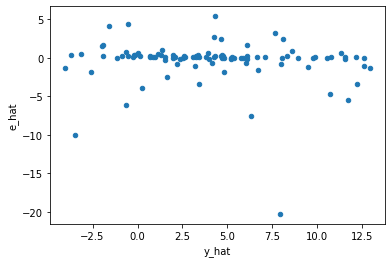

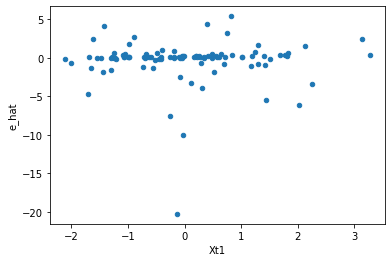

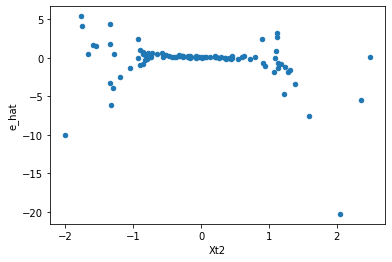

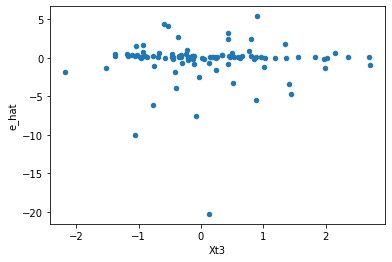

In [10]:
new_table.plot(x ='y_hat', y='e_hat', kind = 'scatter')
new_table.plot(x ='Xt1', y='e_hat', kind = 'scatter')
new_table.plot(x ='Xt2', y='e_hat', kind = 'scatter')
new_table.plot(x ='Xt3', y='e_hat', kind = 'scatter')